In [1]:
import pandas as pd
import numpy as np

# Load data

In [2]:
#sp500 componenets
cons = pd.read_csv('../raw_data_2/cons_70_17.csv')
cons.head()

,gvkey,gvkeyx,from,thru,conm,tic,co_conm,co_tic,co_cusip
0,1078,3,19640331,NaN,S&P 500 Comp-Ltd,I0003,ABBOTT LABORATORIES,ABT,002824100
1,1300,3,19640331,NaN,S&P 500 Comp-Ltd,I0003,HONEYWELL INTERNATIONAL INC,HON,438516106
2,1440,3,19640331,NaN,S&P 500 Comp-Ltd,I0003,AMERICAN ELECTRIC POWER CO,AEP,025537101
3,2285,3,19640331,NaN,S&P 500 Comp-Ltd,I0003,BOEING CO,BA,097023105
4,2403,3,19640331,NaN,S&P 500 Comp-Ltd,I0003,BRISTOL-MYERS SQUIBB CO,BMY,110122108


In [424]:
#actual erning
ibes_actuals = pd.read_csv('../raw_data_2/actuals.csv')
ibes_actuals.head()

,TICKER,CUSIP,OFTIC,CNAME,PENDS,MEASURE,PDICITY,ANNDATS,ANNTIMS,ACTDATS,ACTTIMS,VALUE,CURR_ACT
0,A,02742010,A,AMERN MEDIC BLDG,19881231,EPS,QTR,19890401,0:00:00,19890401,0:00:00,0.07,USD
1,A,02742010,A,AMERN MEDIC BLDG,19890331,EPS,QTR,19890517,0:00:00,19890517,0:00:00,0.00,USD
2,A,02742010,A,AMERN MEDIC BLDG,19890630,EPS,QTR,19890816,0:00:00,19890816,0:00:00,-0.09,USD
3,A,02742010,A,AMERN MEDIC BLDG,19890930,EPS,QTR,19891114,0:00:00,19891114,0:00:00,0.00,USD
4,A,02742010,A,AMERN MEDIC BLDG,19891231,EPS,QTR,19900418,0:00:00,19900418,0:00:00,0.00,USD


In [425]:
#estimated erning
ibes_estimates = pd.read_csv('../raw_data_2/estimates.csv')
ibes_estimates.head()

,TICKER,CUSIP,OFTIC,CNAME,ACTDATS,ANALYS,FPI,MEASURE,VALUE,FPEDATS
0,AA,02224910,AA,ALCOA,19980709,478,6,EPS,0.675,19980930
1,AA,01381710,AA,ALCOA INC.,19990409,297,6,EPS,0.750,19990630
2,AA,01381710,AA,ALCOA INC.,19991011,56581,6,EPS,1.410,19991231
3,AA,01381710,AA,ALCOA INC.,20010212,610,6,EPS,1.320,20010331
4,AA,01381710,AA,ALCOA INC.,20011031,40316,6,EPS,1.050,20011231


In [426]:
#price time series
sp500=pd.read_csv('../raw_data_2/crsp_sp500_1970_2016.csv')
sp500=sp500.drop_duplicates(['TICKER','date'])
sp500.head()

C:\Users\xjl05\AppData\Local\conda\conda\envs\python353\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,PERMNO,date,NCUSIP,TICKER,COMNAM,CUSIP,DIVAMT,BIDLO,ASKHI,PRC,VOL,RET,SHROUT,OPENPRC,NUMTRD,MKTCAP
0,10006,19700102,80010,ACF,A C F INDUSTRIES INC,80010,NaN,48.50,49.250,49.125,2000.0,0.002551,5641.0,NaN,NaN,NaN
1,10006,19700105,80010,ACF,A C F INDUSTRIES INC,80010,NaN,48.75,49.500,49.125,1700.0,0,5641.0,NaN,NaN,NaN
2,10006,19700106,80010,ACF,A C F INDUSTRIES INC,80010,NaN,48.75,49.375,49.125,2400.0,0,5641.0,NaN,NaN,NaN
3,10006,19700107,80010,ACF,A C F INDUSTRIES INC,80010,NaN,49.00,49.750,49.500,1800.0,0.007634,5641.0,NaN,NaN,NaN
4,10006,19700108,80010,ACF,A C F INDUSTRIES INC,80010,NaN,49.00,49.875,49.875,2100.0,0.007576,5641.0,NaN,NaN,NaN


In [427]:
#link table
link_crsp_ibes = pd.read_csv('../raw_data_2/CRSP_IBES_link_table.csv')
link_crsp_ibes.head()

,TICKER,PERMNO,NCUSIP,sdate,edate,SCORE
0,00VP,15703.0,32008D10,19NOV2015,30DEC2016,1
1,01AB,16342.0,G0084W10,17NOV2016,30DEC2016,1
2,01AF,16347.0,01387210,17NOV2016,30DEC2016,1
3,AA,24643.0,02224910,15JAN1976,03JAN1999,1
4,AA,24643.0,01381710,14JAN1999,05OCT2016,1


In [428]:
link_crsp_comp = pd.read_csv('../raw_data_2/Compustat_CRSP_link_table.csv')
link_crsp_comp.head()

,gvkey,conm,tic,cusip,LINKPRIM,LIID,LINKTYPE,LPERMNO,LPERMCO,LINKDT,LINKENDDT
0,1010,ACF INDUSTRIES HOLDING CORP,4165A,00099V004,C,00X,LU,10006,22156,19500501,19620130
1,1010,ACF INDUSTRIES HOLDING CORP,4165A,00099V004,P,01,LU,10006,22156,19620131,19840628
2,1013,ADC TELECOMMUNICATIONS INC,ADCT,000886309,P,01,LU,50906,2902,19790316,20101231
3,1040,AMF INC,AMF.2,001688100,P,01,LU,15763,22631,19620131,19851031
4,1040,AMF INC,AMF.2,001688100,C,00X,LU,15763,22631,19500101,19620130


# Merge data

- create **df_forecast**: with columns **ticker, ern_date, quarternum, analyst_id** ,**analyst_ern_forecast**
- create **df_actual**: **ticker, ern_date, quarternum** and columns **actual_ern_value** and **actual_date**

In order to merge the 2 dataframes, ern_date here is the accounting period.

In [429]:
ibes_estimates['quarternum']=(ibes_estimates['FPEDATS']%10000/100/3).astype(int)
ibes_estimates=ibes_estimates.rename(columns={'TICKER':'ticker','FPEDATS':'ern_date','ANALYS':'analyst_id','VALUE':'analyst_ern_forecast'})
df_forecast=ibes_estimates[['ticker','ern_date','quarternum','analyst_id','analyst_ern_forecast']]
df_forecast.head()

,ticker,ern_date,quarternum,analyst_id,analyst_ern_forecast
0,AA,19980930,3,478,0.675
1,AA,19990630,2,297,0.750
2,AA,19991231,4,56581,1.410
3,AA,20010331,1,610,1.320
4,AA,20011231,4,40316,1.050


In [430]:
#find duplicated records for the same accounting period
print(ibes_actuals[ibes_actuals[['TICKER','PENDS']].duplicated()])
ibes_actuals[(ibes_actuals['TICKER']=='STD2')&(ibes_actuals['PENDS']==20150930)]

      TICKER     CUSIP OFTIC         CNAME     PENDS MEASURE PDICITY  \
46111   STD2  05964H10   SAN  BANCO STD SA  20150930     EPS     QTR   

        ANNDATS  ANNTIMS   ACTDATS   ACTTIMS  VALUE CURR_ACT  
46111  20151029  7:22:00  20151217  10:19:24    NaN      EUR  


,TICKER,CUSIP,OFTIC,CNAME,PENDS,MEASURE,PDICITY,ANNDATS,ANNTIMS,ACTDATS,ACTTIMS,VALUE,CURR_ACT
46110,STD2,05964H10,SAN,BANCO STD SA,20150930,EPS,QTR,20151029,7:22:00,20151029,7:23:26,NaN,USD
46111,STD2,05964H10,SAN,BANCO STD SA,20150930,EPS,QTR,20151029,7:22:00,20151217,10:19:24,NaN,EUR


In [431]:
#drop it
ibes_actuals=ibes_actuals.drop_duplicates(['TICKER','PENDS'])

If there are multiple ernings anounced at the same day, keep the latest one.

In [432]:
ibes_actuals=ibes_actuals.drop_duplicates(['TICKER','ANNDATS'],keep='last')

In [433]:
ibes_actuals['quarternum']=(ibes_actuals['PENDS']%10000/100/3).astype(int)
ibes_actuals=ibes_actuals.rename(columns={'TICKER':'ticker','PENDS':'ern_date','ANNDATS':'ann_date','VALUE':'actual_ern_value'})
df_actual=ibes_actuals.set_index(['ticker','ern_date','quarternum'])[['actual_ern_value','ann_date']]
df_actual.head()

actual_ern_value  ann_date
ticker ern_date quarternum                            
A      19881231 4                       0.07  19890401
       19890331 1                       0.00  19890517
       19890630 2                      -0.09  19890816
       19890930 3                       0.00  19891114
       19891231 4                       0.00  19900418

In [434]:
#analyst distribution
forecast_median=df_forecast.groupby(['ticker','ern_date','quarternum']).median()['analyst_ern_forecast']
forecast_mean=df_forecast.groupby(['ticker','ern_date','quarternum']).mean()['analyst_ern_forecast']
forecast_skew=forecast_median-forecast_mean
#use Q3-Q1 as an alternative measure of kurtosis
forecast_kurtosis=df_forecast.groupby(['ticker','ern_date','quarternum']).quantile(0.75)['analyst_ern_forecast']-df_forecast.groupby(['ticker','ern_date','quarternum']).quantile(0.25)['analyst_ern_forecast']
forecast_std=df_forecast.groupby(['ticker','ern_date','quarternum']).std()['analyst_ern_forecast']
forecast_count=df_forecast.groupby(['ticker','ern_date','quarternum']).count()['analyst_ern_forecast']
forecast_range=(df_forecast.groupby(['ticker','ern_date','quarternum']).max()-df_forecast.groupby(['ticker','ern_date','quarternum']).min())['analyst_ern_forecast']

I normalized the metrics of analyst ditribution by dividing by the standard deviation of forecast.

For stocks with only 1 estimation, I normalied by dividing the average of other stocks'(in the same quarter) standard deviation. For stocks with standard deviation of 0, I normalized by dividing by 0.000001, in order to prevent inf after division.

In [435]:
#normalize
#fill the nan with mean in the same quarter
def fill(df,by_mean=True,col='analyst_ern_forecast'):
    #by_mean: True if fill with mean, False if fill with 1
    if(by_mean):
        df[col]=df[col].fillna(df[col].mean())
    else:
        df[col]=df[col].fillna(1)
    return df
filled_std=forecast_std.reset_index().groupby('ern_date').apply(fill)
filled_std=filled_std.set_index(['ticker','ern_date','quarternum'])
filled_std=filled_std.replace(0,0.000001)

### Merge the forecast distribution and actual erning

In [436]:
#merge the actual with the analyst distribution, with normalization
df_actual['median_surprise']=forecast_median-df_actual['actual_ern_value']
df_actual['mean_surprise']=forecast_mean-df_actual['actual_ern_value']
df_actual['forecast_skew']=forecast_skew
df_actual['forecast_kurt']=forecast_kurtosis
df_actual['std']=forecast_std
df_actual['filled_std']=filled_std
df_actual['forecast_count']=forecast_count
df_actual['forecast_range']=forecast_range

df_actual['median_surprise']=df_actual['median_surprise']/df_actual['filled_std']
df_actual['mean_surprise']=df_actual['mean_surprise']/df_actual['filled_std']
df_actual['forecast_skew']=df_actual['forecast_skew']/df_actual['filled_std']
df_actual['forecast_kurt']=df_actual['forecast_kurt']/df_actual['filled_std']

In [437]:
df_actual.head()

actual_ern_value  ann_date  median_surprise  \
ticker ern_date quarternum                                                
A      19881231 4                       0.07  19890401              NaN   
       19890331 1                       0.00  19890517              NaN   
       19890630 2                      -0.09  19890816              NaN   
       19890930 3                       0.00  19891114              NaN   
       19891231 4                       0.00  19900418              NaN   

                            mean_surprise  forecast_skew  forecast_kurt  std  \
ticker ern_date quarternum                                                     
A      19881231 4                     NaN            NaN            NaN  NaN   
       19890331 1                     NaN            NaN            NaN  NaN   
       19890630 2                     NaN            NaN            NaN  NaN   
       19890930 3                     NaN            NaN            NaN  NaN   
       19891231 4                     NaN            NaN            NaN  NaN   

                            filled_std  forecast_count  forecast_range  
ticker ern_date quarternum                                              
A      19881231 4                  NaN             NaN             NaN  
       19890331 1                  NaN             NaN             NaN  
       19890630 2                  NaN             NaN             NaN  
       19890930 3                  NaN             NaN             NaN  
       19891231 4                  NaN             NaN             NaN

# Pre- and post- erning drift

Construct a table of the following format:

●	The multi-index is [ticker, actual_date, quaternum], e.g. the ticker of the stock, the earning announcement date and the quarter number of the announcement, e.g. 1,...,4

●	There are 61 columns ranging from -30,...,-1,0,1,....,30 corresponding to the number of days after the earnings announcement. 0 corresponds to the day of the earnings announcement, e.g. the act_date. If it is not a business day, it corresponds to the next business day. 


In [438]:
#trading days
dates=sp500['date'].unique()
dates.sort()

In [439]:
#price time series
df_price=df_actual['ann_date'].reset_index()
del df_price['ern_date']

## Announcement between 1975 and 1989

In [440]:
before_1989=df_price[(df_price['ann_date']<=19891231)&(df_price['ann_date']>=19750101)]

#find the dates for every cell
before_1989['date_index']=before_1989['ann_date'].apply(lambda x:list(dates).index(dates[dates>=x][0]))
for i in range(-30,31,1):
    before_1989[i]=before_1989['date_index']+i
    before_1989[i]=before_1989[i].apply(lambda x: dates[x])
del before_1989['date_index']

C:\Users\xjl05\AppData\Local\conda\conda\envs\python353\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\xjl05\AppData\Local\conda\conda\envs\python353\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\xjl05\AppData\Local\conda\conda\envs\python353\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [441]:
#find the price of every cell
for i in range(-30,31,1):
    pricei=pd.merge(before_1989[['ticker',i]],sp500[['TICKER','date','PRC']],left_on=['ticker',i],
                    right_on=['TICKER','date'],how='left')
    before_1989[i]=pricei['PRC']

C:\Users\xjl05\AppData\Local\conda\conda\envs\python353\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [442]:
#normalize the price
for i in range(-30,31,1):
    if i!=0:
        before_1989[i]=before_1989[i]/before_1989[0]
before_1989[0]=before_1989[0]/before_1989[0]

C:\Users\xjl05\AppData\Local\conda\conda\envs\python353\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\xjl05\AppData\Local\conda\conda\envs\python353\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [443]:
#compute jumps, and identify top and bottom 10%
before_1989['jump']=before_1989[1]-before_1989[-1]
q1=before_1989['jump'].quantile(0.1)
q9=before_1989['jump'].quantile(0.9)
before_1989['top_bottom']=np.where(before_1989['jump']>q9,1,np.where(before_1989['jump']<q1,-1,0))

C:\Users\xjl05\AppData\Local\conda\conda\envs\python353\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\xjl05\AppData\Local\conda\conda\envs\python353\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [444]:
#save to file
before_1989.drop(columns=['top_bottom','jump']).set_index(['ticker','quarternum','ann_date']).to_pickle('../pkl_data_2/before_1989.pkl')

In [445]:
import matplotlib.pyplot as plt
top_price=before_1989[before_1989['top_bottom']==1][range(-30,31)].mean()
bottom_price=before_1989[before_1989['top_bottom']==-1][range(-30,31)].mean()

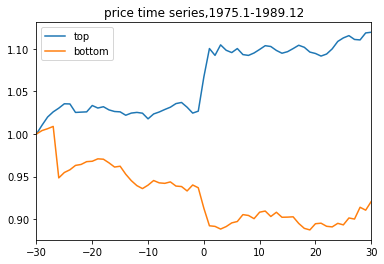

In [446]:
(top_price/top_price[-30]).plot()
(bottom_price/bottom_price[-30]).plot()
plt.legend(['top','bottom'])
plt.title('price time series,1975.1-1989.12')
plt.savefig('../images/price_before1989_1')

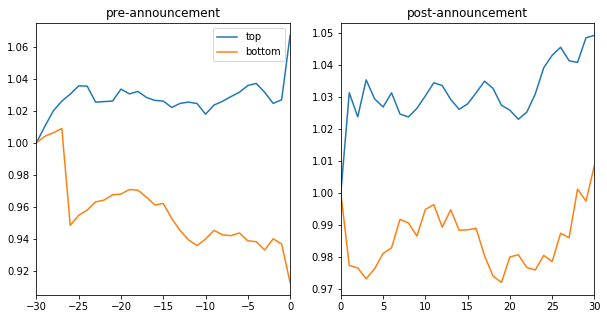

In [447]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
(top_price[:31]/top_price[-30]).plot()
(bottom_price[:31]/bottom_price[-30]).plot()
plt.legend(['top','bottom'])
plt.title('pre-announcement')

plt.subplot(1,2,2)
top_price[30:].plot()
bottom_price[30:].plot()
plt.title('post-announcement')

plt.savefig('../images/price_before1989_2')

In [448]:
print(before_1989[0].count())
print(before_1989[0].shape)

155
(8416,)


## Announcement after 1989

repeat previous steps for data between 19900101-20161230

In [449]:
after_1989=df_price[(df_price['ann_date']>19891231)&(df_price['ann_date']<=20161230)]

#find the dates for every cell
after_1989['date_index']=after_1989['ann_date'].apply(lambda x:list(dates).index(dates[dates>=x][0]))
for i in range(-30,31,1):
    after_1989[i]=after_1989['date_index']+i
    def finddate(x):#because some date after anouncement can go beyond the latest price we have
        try:
            return dates[x]
        except:
            return np.nan
    after_1989[i]=after_1989[i].apply(finddate)
del after_1989['date_index']

#find the price of every cell
for i in range(-30,31,1):
    pricei=pd.merge(after_1989[['ticker',i]],sp500[['TICKER','date','PRC']],left_on=['ticker',i],
                    right_on=['TICKER','date'],how='left')
    after_1989[i]=pricei['PRC']
    
#normalize the price
for i in range(-30,31,1):
    if i!=0:
        after_1989[i]=after_1989[i]/after_1989[0]
after_1989[0]=after_1989[0]/after_1989[0]

#compute jumps, and identify top and bottom 10%
after_1989['jump']=after_1989[1]-after_1989[-1]
q1=after_1989['jump'].quantile(0.1)
q9=after_1989['jump'].quantile(0.9)
after_1989['top_bottom']=np.where(after_1989['jump']>q9,1,np.where(after_1989['jump']<q1,-1,0))

#save to file
after_1989.drop(columns=['top_bottom','jump']).set_index(['ticker','quarternum','ann_date']).to_pickle('../pkl_data_2/after_1989.pkl')

C:\Users\xjl05\AppData\Local\conda\conda\envs\python353\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\xjl05\AppData\Local\conda\conda\envs\python353\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\xjl05\AppData\Local\conda\conda\envs\python353\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

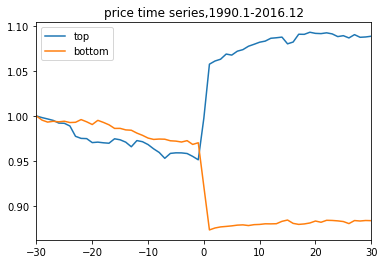

In [450]:
#plot
top_price=after_1989[after_1989['top_bottom']==1][range(-30,31)].mean()
bottom_price=after_1989[after_1989['top_bottom']==-1][range(-30,31)].mean()

(top_price/top_price[-30]).plot()
(bottom_price/bottom_price[-30]).plot()
plt.legend(['top','bottom'])
plt.title('price time series,1990.1-2016.12')
plt.savefig('../images/price_after1989_1')

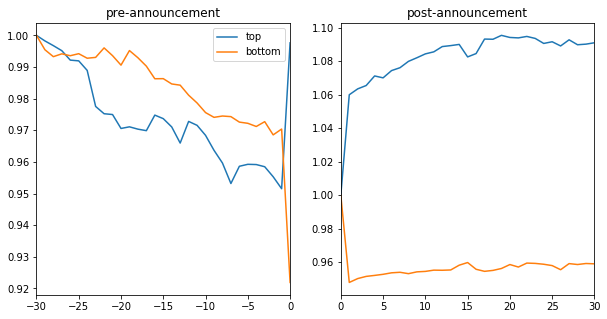

In [451]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
(top_price[:31]/top_price[-30]).plot()
(bottom_price[:31]/bottom_price[-30]).plot()
plt.legend(['top','bottom'])
plt.title('pre-announcement')

plt.subplot(1,2,2)
top_price[30:].plot()
bottom_price[30:].plot()
plt.title('post-announcement')

plt.savefig('../images/price_after1989_2')

In [452]:
print(after_1989[0].count())
print(after_1989[0].shape)

3506
(44701,)


## Concusion:

Between 1975 and 1989, we confirm that stocks with large 1-day price jumps around erning announcement also had large price drift from 30 days before till 30days after erning annoucement, especially in pre-annoucement drift. While stocks with small 1-day price jumps experienced small 60-day price drift around announcement.

The pattern changed for pre-annoucement drift since 1989. The top price-jump group no longer won the bottom group until 1 day before annoucement. 

# Conditioning on analyst surprise

If the data is enough, median analyst forecast is a more reliable predictor of actual erning compared to mean forecast. Because mean is sensitive to abnormal values, while median value is more stable.

However, in our data, more than half the actual erning had only 1 or 2 forecasts, which makes it indifferent to use either median or mean.

**We adopt 2 measures of erning surprise:**
  
  -median_surprise=(median forecast-actual erning)/forecast_std
  
  -mean_surprise=(mean forecast-actual erning)/forecast_std
  
 **And 2 measures of forecast distribution:**
   
  -forecast_skew=(median forecast-mean forecast)/forecast_std
  
  -mean_surprise=(75%quantile of forecasts-25%quantile of forecast)/forecast_std
  
 **Adjustment to standard deviation:**

If forecast_std = 0, replace it with 0.000001 to prevent infinity. If there is only one estimation, replace it with the average std of other stocks' forecasts in the same period. 
 

In [453]:
#drop records when no price is found
before=before_1989.drop(columns=['top_bottom','jump']).set_index(['ticker','ann_date','quarternum']).dropna()
after=after_1989.drop(columns=['top_bottom','jump']).set_index(['ticker','ann_date','quarternum']).dropna()

In [454]:
#merge before 1989 and after 1989
prices=pd.concat([before,after])
prices.head()

-30       -29       -28       -27       -26  \
ticker ann_date quarternum                                                     
AAL    19890802 2           1.032967  1.043956  1.049451  1.021978  1.000000   
       19891104 3           1.072917  1.078125  1.041667  1.041667  1.046875   
ADI    19830526 1           0.780769  0.776923  0.788462  0.807692  0.807692   
       19830826 2           0.960486  0.972644  0.972644  0.981763  0.978723   
       19831214 3           0.739024  0.729268  0.731707  0.736585  0.731707   

                                 -25       -24       -23       -22       -21  \
ticker ann_date quarternum                                                     
AAL    19890802 2           0.967033  0.923077  0.873626  0.884615  0.901099   
       19891104 3           1.057292  1.062500  1.046875  1.031250  1.031250   
ADI    19830526 1           0.811538  0.846154  0.838462  0.838462  0.846154   
       19830826 2           0.978723  1.027356  1.039514  1.048632  1.069909   
       19831214 3           0.731707  0.726829  0.741463  0.770732  0.804878   

                            ...        21        22        23        24  \
ticker ann_date quarternum  ...                                           
AAL    19890802 2           ...  1.027473  1.032967  1.038462  1.054945   
       19891104 3           ...  0.802083  0.807292  0.822917  0.828125   
ADI    19830526 1           ...  1.123077  1.150000  1.134615  1.157692   
       19830826 2           ...  0.960486  0.957447  0.942249  0.948328   
       19831214 3           ...  0.526829  0.519512  0.534146  0.521951   

                                  25        26        27        28        29  \
ticker ann_date quarternum                                                     
AAL    19890802 2           1.109890  1.131868  1.126374  1.142857  1.164835   
       19891104 3           0.838542  0.828125  0.843750  0.848958  0.843750   
ADI    19830526 1           1.200000  1.207692  1.184615  1.215385  1.230769   
       19830826 2           0.948328  0.948328  0.948328  0.954407  0.948328   
       19831214 3           0.526829  0.514634  0.512195  0.517073  0.536585   

                                  30  
ticker ann_date quarternum            
AAL    19890802 2           1.137363  
       19891104 3           0.843750  
ADI    19830526 1           1.230769  
       19830826 2           0.948328  
       19831214 3           0.529268  

[5 rows x 61 columns]

In [455]:
#We already create df_forecast and df_actual before. Now save them
df_forecast.set_index(['ticker','ern_date','quarternum','analyst_id']).to_pickle('../pkl_data_2/df_forecast.pkl')
df_actual.to_pickle('../pkl_data_2/df_actual.pkl')

## Merge price time series with erning surprise and forecast distribution

In [456]:
#merge price data and 
df_actual=df_actual.reset_index().set_index(['ticker','ann_date','quarternum'])
all_data=pd.merge(prices,df_actual,left_index=True, right_index=True,how='inner')
all_data.head()

,,,-30,-29,-28,-27,-26,-25,-24,-23,-22,-21,...,ern_date,actual_ern_value,median_surprise,mean_surprise,forecast_skew,forecast_kurt,std,filled_std,forecast_count,forecast_range
ticker,ann_date,quarternum,,,,,,,,,,,,,,,,,,,,,
ADCT,20030820,2,0.931452,0.935484,0.963710,0.979839,0.943548,0.967742,0.967742,0.971774,0.979839,0.975806,...,20030731,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MAT,20010419,1,0.876686,0.885678,0.894027,0.897881,0.890173,0.876044,0.889852,0.883751,0.893385,0.917791,...,20010331,-0.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EOP,19980512,1,0.961187,0.972603,0.972603,1.000000,0.997717,1.004566,0.981735,1.002283,0.990868,0.988584,...,19980331,0.270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MUR,20121031,3,0.945957,0.954666,0.973875,0.967728,0.971826,0.958764,0.966362,0.940664,0.921967,0.920943,...,20120930,1.170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KR,20090310,0,0.923877,0.924699,0.948521,0.941950,0.943319,0.958379,0.965498,0.966046,0.967141,0.971249,...,20090131,0.265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [457]:
#drop records with no erning forecast
all_data=all_data[all_data['forecast_count']>0]
all_data.shape

(833, 71)

In [458]:
all_data.head()

,,,-30,-29,-28,-27,-26,-25,-24,-23,-22,-21,...,ern_date,actual_ern_value,median_surprise,mean_surprise,forecast_skew,forecast_kurt,std,filled_std,forecast_count,forecast_range
ticker,ann_date,quarternum,,,,,,,,,,,,,,,,,,,,,
EQIX,20121101,3,1.004767,1.026130,1.021540,1.009710,1.007415,1.057733,1.047316,1.057910,1.076977,1.055438,...,20120930,0.5481,1.020270,1.020270,0.000000,0.000000,NaN,0.138983,1.0,0.000
LEN,20070117,3,1.265306,1.285714,1.285714,1.306122,1.316327,1.306122,1.275510,1.255102,1.193878,1.153061,...,20061130,-1.2400,7.323156,7.216092,0.107064,0.995692,0.311341,0.311341,3.0,0.620
AMD,20060118,4,0.861607,0.872768,0.821429,0.816964,0.790179,0.812500,0.825893,0.852679,0.866071,0.897321,...,20051231,0.4500,-1.557026,-1.521094,-0.035931,2.036111,0.083493,0.083493,9.0,0.213
DAL,20131022,3,1.091364,1.071339,1.069337,1.066834,1.057822,1.059074,1.080601,1.059825,1.081852,1.069837,...,20130930,1.4100,-0.571693,-0.571693,0.000000,0.000000,NaN,0.104951,1.0,0.000
MCHP,20150507,1,1.033730,1.035714,1.027778,1.029762,1.025794,1.021825,1.031746,1.045635,1.053571,1.033730,...,20150331,0.6800,-4.323460,-4.003204,-0.320256,0.960769,0.020817,0.020817,3.0,0.040


In [459]:
#save to file
all_data.to_pickle('../pkl_data_2/merged_data.pkl')

In [480]:
def price_with_surprise(i,group=10):
    #i：feature name
    all_data['quantile'] = pd.qcut(all_data[i], group, labels=False)
    plt.figure(figsize=(8,10))
    plt.subplot(2,1,1)
    if(group==2):
        for j in [0,1]:
            ts=all_data[all_data['quantile']==j][range(-30,31)].mean()
            ts.plot()
        plt.legend(['bottom half','top half'])    
    else:
        for j in [0,int(group/2),group-1]:
            ts=all_data[all_data['quantile']==j][range(-30,31)].mean()
            ts.plot()
        plt.legend(['bottom group','median group','top group'])    
    plt.title('price time series by '+i)

    #plot average return~surprise
    plt.subplot(2,1,2)
    price_by_q=all_data.groupby('quantile').mean()
    price_by_q[-30].plot()
    price_by_q[-10].plot()
    price_by_q[10].plot()
    price_by_q[30].plot()
    plt.legend(['pre 30 day price','pre 10 day price','post 10 day price','post 30 day porice'])
    plt.title('average price of 10 quantile groups by '+i)
    
    plt.savefig('../images/price_with_'+i)
    plt.show()
    

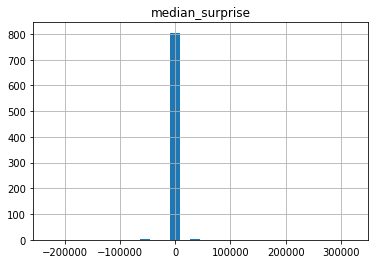

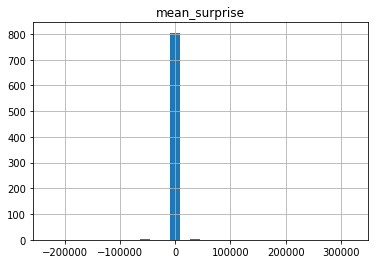

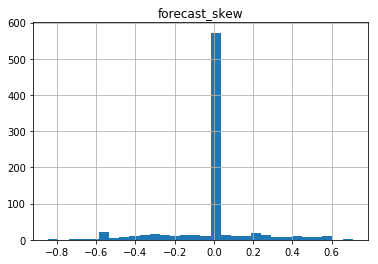

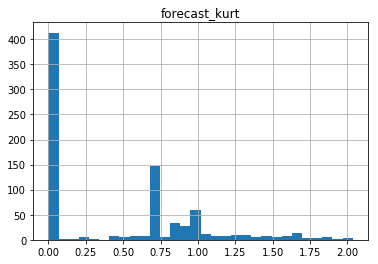

In [464]:
#distribution of the metrics
for i in ['median_surprise','mean_surprise','forecast_skew','forecast_kurt']:
    all_data[i].hist(bins=30)
    plt.title(i)
    plt.show()

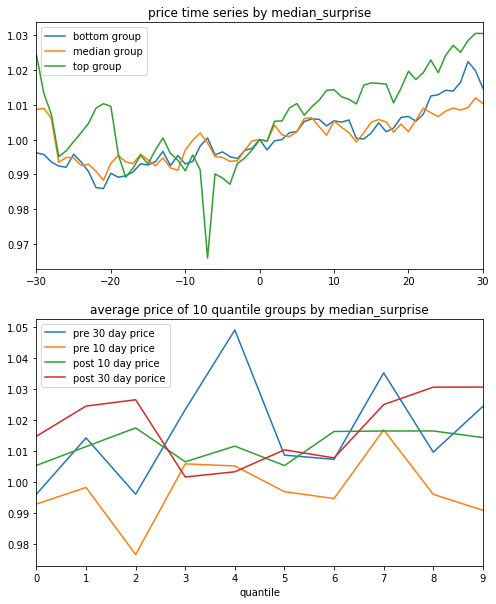

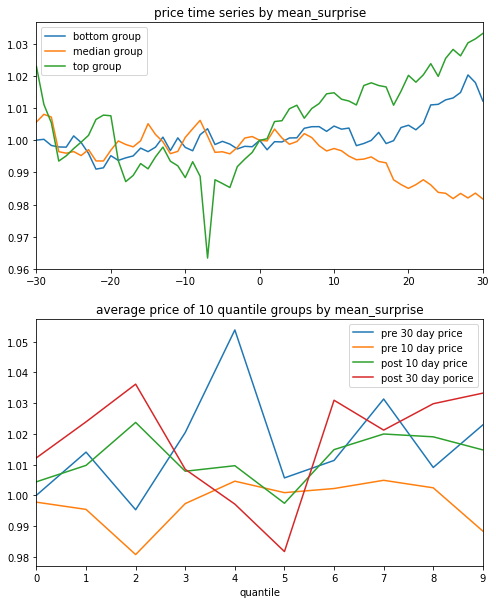

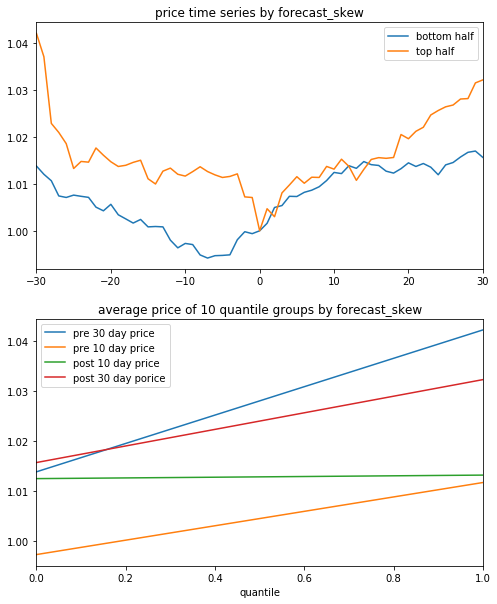

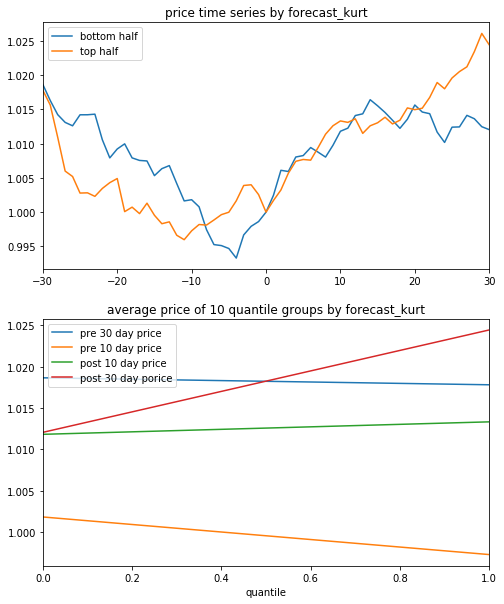

In [481]:
#plot relationship between price time series with surprise/distribution metrics
for i in ['median_surprise','mean_surprise','forecast_skew','forecast_kurt']:
    if i in ['forecast_skew','forecast_kurt']:
        price_with_surprise(i,group=2)
    else:
        price_with_surprise(i)

## Conclusion

Top 10% group in median_surprise has largest post 30 day price, and its post-announcement drift is larger than the bottom 10% group. Same conclusion to the top 10% group in mean_surprise.

Top half group in forecast_skewness has larger post 30 day price, pre 10 day price, and pre 30 day price. The price drift is more negative in pre-announcement period, and more positive in post-announcement period.

Top half group in forecast_kurtosis has larger post 30 day price, but smaller pre 10 day price and pre 30 day price. The price drift is more positive in post-announcement period.

Due to the deficiency of of data (almost half erning had only 1 forecast), the conclusions above are not reliable!